# Problem 1

Initial Thoughts:

* The price of capital appears to be not constant in this model
* There is a sign mistake in (5), or $\phi$ is negative by convention

## 1

All the capital in the economy yields the following return:

$$dr_{t}^{K}(\iota_{t}^{i})=\Big(\frac{a_{t}-\iota_{t}^{i}}{q_{t}}+\Phi\big(\frac{\bar{a}}{a_{t}}\iota_{t}^{i}\big)-\delta\Big)dt+\sigma_{t}^{q}dZ_{t}$$

Goods market clearing, $\Phi(\iota)=\frac{1}{\kappa}\log(\kappa \iota+1)$, and $c_t = \rho q_t k_q$ yields:
$$q_t\Big(\rho + \frac{1}{\kappa}\Big)=a_t\Big(1+\frac{1}{\kappa\bar{a}}\Big)$$

Equating percentage changes from left and right implies $\sigma_t^q=\sigma$ and $\mu_t^q = 0$. Then all the $(\sigma+\sigma_t^q)$ terms in the slides come out exactly the same, namely $\sigma$.

## 2

If $\phi>0$ there is a drift in $q_t$. 

??

## 3

??

# Problem 2

## 1
Goods market clearing yields:
$$\eta_{t}(\rho-\underline{\rho})+\underline{\rho}=\frac{a+\frac{1}{\kappa}}{q_{t}}-\frac{1}{\kappa}$$
Price is a function of the wealth share: 
$$q=\frac{a+\frac{1}{\kappa}}{\eta(\rho-\underline{\rho})+\underline{\rho}+\frac{1}{\kappa}}$$
This gives rise to:
$$\sigma^{q}=\frac{(\underline{\rho}-\rho)(\eta-1)\sigma}{2\underline{\rho}-\rho+\frac{1}{\kappa}}$$
and an ugly expression for $\mu_t^q$.

Plugging into the last equation on slide 30 yields:
$$\mu^{\eta}=\frac{a-\iota}{q}-\rho+\Big(\frac{\eta-1}{\eta}\Big)^{2}\big(\sigma+\sigma^{q}\big)^{2}$$
and 
$$\sigma^{\eta}=-\frac{\eta-1}{\eta}\big(\sigma+\sigma^{q}\big)$$
And finally $\iota = \frac{q - 1}{\kappa}$ as before.

## 2

In [2]:
q(η) = (a + 1/κ) / (η * (ρ + ρ_) + ρ_ + 1/κ)
σq(η) = (ρ_ - ρ) * (η - 1) * σ / (2 * ρ_ - ρ + 1/κ)
μη(η) = (a - ι(η)) / q(η) - ρ + ((η-1) / η)^2 * (σ + σq(η))^2
ση(η) = -(η-1)/η * (σ + σq(η))
ι(η) = (q(η) - 1) / κ
σn(η) = 1/η * (σ + σq(η))
Φ(ι) = 1/κ * log(κ * ι + 1)

#r(η) = (a - ι(η))/q(η) + Φ(ι) - δ + μq(η) + σ * σq(η) - σn(η) * (σ + σq(η))
#needs μq(η), but this depends on μn!

In [35]:
using Plots, LaTeXStrings; pyplot();

const κ = 10.
const a = 0.11
const ρ = 0.05
const ρ_ = 0.02
const σ  = 0.1;

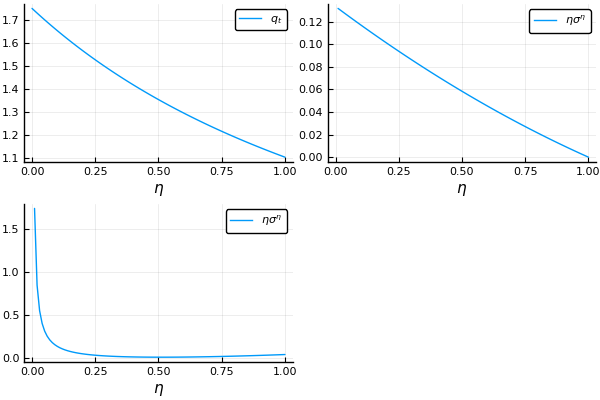

In [41]:
grid = collect(0:0.01:1)
plot(
    plot(grid, q.(grid), label = L"q_t"),
    plot(grid, grid .* ση.(grid), label = L"\eta \sigma^\eta"),
    plot(grid, grid .* μη.(grid), label = L"\eta \sigma^\eta"),
    xlab = L"\eta")

$\mu^\eta$ seems wrong!

## 3
When a bad shock hits, the price of capital rises and more is invested!

## 4
??

# Problem 3
## 2

`g` takes a scalar `x` and a vector `y` and returns a vector. Vectors are of length `n`.

In [219]:
using NLsolve, DifferentialEquations

function explicit_Euler(g; grid_x = collect(0:0.01:10), n = 1, x0 = 1)
    
    grid_y = zeros(length(grid_x), n)
    grid_y[1, :] .= x0

    for i in 2:size(grid_y, 1)
        grid_y[i, :] .= grid_y[i-1, :] .+ g(grid_x[i-1], grid_y[i-1, :]) * (grid_x[i] - grid_x[i-1])
    end
    
    return (grid_x, grid_y)
end

function implicit_Euler(g; grid_x = collect(0:0.01:10), n = 1, x0 = 1)
    
    grid_y = zeros(length(grid_x), n)
    grid_y[1, :] .= x0
    
    for i in 2:size(grid_y, 1)
        function resid!(res, y)
            res .= (y - grid_y[i-1, :]) / (grid_x[i] - grid_x[i-1]) - g(grid_x[i], y)
        end
      
        grid_y[i, :] .= nlsolve(resid!, zeros(size(grid_y, 2)), autodiff = :forward).zero
    end
    
    return (grid_x, grid_y)
end

implicit_Euler (generic function with 3 methods)

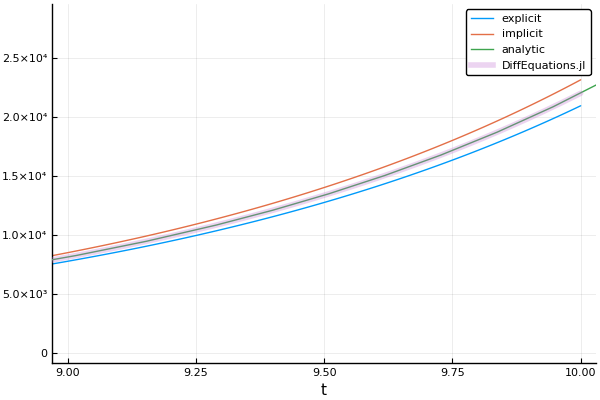

In [210]:
g(x, y) = y

plot(explicit_Euler(g), label = "explicit")
plot!(implicit_Euler(g), label = "implicit")
plot!(exp, label = "analytic")
plot!(solve(ODEProblem((u,p,t) -> g(t, u), 1., (0.0,10.0))), 
    label = "DiffEquations.jl", alpha = 0.3, width = 4, xlim = [9., 10.])

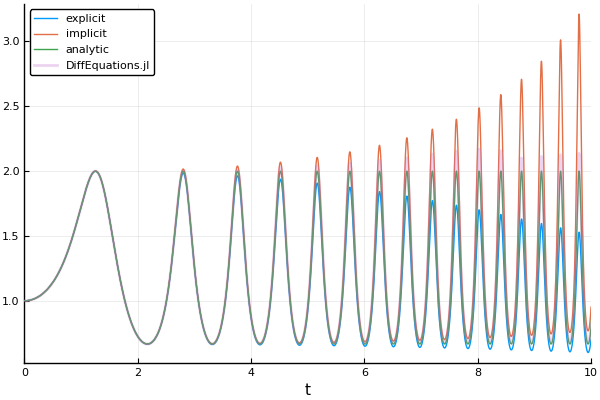

In [215]:
g(x, y) = x * cos(x^2) * y.^2

plot(explicit_Euler(g, grid_x = collect(0:0.001:10)),  label = "explicit")
plot!(implicit_Euler(g, grid_x = collect(0:0.001:10)), label = "implicit")
plot!(x -> 1 / (1 - sin(x^2)/2), label = "analytic")
plot!(solve(ODEProblem((u,p,t) -> g(t, u), 1., (0.0,10.0))), 
    label = "DiffEquations.jl", alpha = 0.3, width = 2)

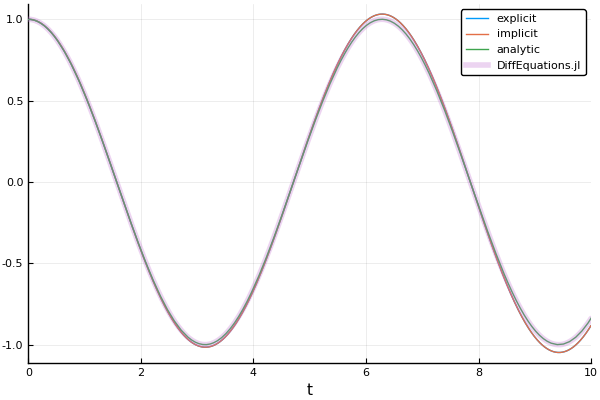

In [227]:
g(x, y) = [y[2], - y[1]]

(grid_x, grid_y) = explicit_Euler(g, n = 2, x0 = [1., 0.])
plot(grid_x, grid_y[:, 1], label = "explicit")
(grid_x, grid_y) = explicit_Euler(g, n = 2, x0 = [1., 0.])
plot!(grid_x, grid_y[:, 1], label = "implicit")
plot!(cos, label = "analytic")
plot!(solve(ODEProblem((u,p,t) -> g(t, u), [1., 0.], (0.0, 10.0))), vars = (0, 1), 
    label = "DiffEquations.jl", alpha = 0.3, width = 4)

# Problem 4

## 1

Let $y_1=1$, then $y_j=\big(1+\lambda\Delta x\big)^{j-1}$ for $j=1,...,N$. And define $\lambda = \lambda^{r} + i \lambda^{i}$.

### a
$|y_j|$ is the radius of $y_j$ when written in polar form $y_j=r^{j-1} e^{(j-1) i \theta }$, with $r=\sqrt{1+2\lambda^r\Delta x + \Delta x^2 \big(\lambda^{r 2} + \lambda^{i 2}\big)}$.

So the question is whether:
* $r<1$ to make $|y_j|$ strictly decreasing and converge to zero
* $r \leq 1$ to make $|y_j|$ bounded

But even if $\lambda^r<0$, $r>1$ is possible if only $\Delta x \big(\lambda^{r 2} + \lambda^{i 2}\big) > -2\lambda^r$ which is achieved if $\lambda^{i}$ is large.

### b

Let $y_1=1$, then $y_j=\big(1-\lambda\Delta x\big)^{-j+1}$ for $j=1,...,N$ and $r=\sqrt{1-2\lambda^r\Delta x + \Delta x^2 \big(\lambda^{r 2} + \lambda^{i 2}\big)} > 1$ for all combinations of $\lambda^{r} < 0$ and $\lambda^{i}$.

## 2

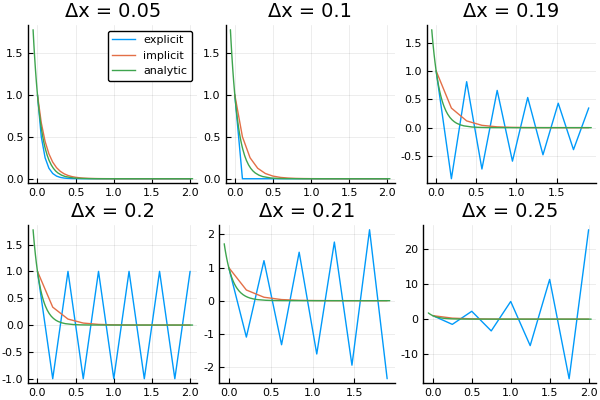

In [239]:
λ = -10.

g(x, y) = λ * y

p = Vector{Plots.Plot{Plots.PyPlotBackend}}(undef, 6)

for (i, Δx) in enumerate([0.05, 0.1, 0.19, 0.2, 0.21, 0.25])
    p[i] = plot(explicit_Euler(g, grid_x = collect(0:Δx:2)), label = "explicit")
    plot!(p[i], implicit_Euler(g, grid_x = collect(0:Δx:2)), label = "implicit")
    plot!(p[i], x -> exp(λ * x), label = "analytic", title = "Δx = $(Δx)", legend = i == 1)
end

plot(p...)

The convergence behavior of the explicit method depends on the step size. That is not the case for the implicit method.